Ha Phung

 - Kate
 - Logan
 - Pronob

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 1 - Linear Regression

Due Friday Feb 13, 2025 11:30a

Total pts: 20

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - Do not rewrite code if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [905]:
import pandas as pd
import numpy as np
import sklearn as sk

from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [906]:
def print_model(bias, Theta, X_names, model_name = None):
    # A function to print the equation of a linear model
    if model_name is None:
        model_str = f'y ='
    else:
        model_str = f'{model_name}:\n y ='

    if not bias==0:
        model_str += f' {bias:.2f}'
        
    for theta, x in zip(Theta, X_names):
        if theta==0:
            continue
        else:
            model_str+= f' + {theta:.2f}*{x}'
    print(model_str)

In [907]:
np.random.seed(15)
bias = 20*np.random.randn()

X, y, coef = make_regression(n_samples=300, 
                                   n_features=5,    # n_features = 5 --> simple linear regression
                                   noise=10, 
                                   bias = bias, 
                                   random_state=5, 
                                   shuffle = False, # samples will be in order
                                   coef = True) 

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg_df = pd.DataFrame(data = X, 
             columns = column_names)
reg_df['y'] = y

reg_df

,x1,x2,x3,x4,x5,y
0,0.441227,-0.330870,2.430771,-0.252092,0.109610,244.349429
1,1.582481,-0.909232,-0.591637,0.187603,-0.329870,-66.739816
2,-1.192765,-0.204877,-0.358829,0.603472,-1.664789,-154.409110
3,-0.700179,1.151391,1.857331,-1.511180,0.644848,194.236600
4,-0.980608,-0.856853,-0.871879,-0.422508,0.996440,-87.092471
...,...,...,...,...,...,...
295,0.423162,-0.988746,0.741750,1.130381,-0.189154,67.307896
296,-2.075862,-0.911934,0.037560,0.697767,-0.506700,-90.781843
297,1.006915,-0.513603,-1.360830,0.438510,-0.675455,-150.392513
298,1.310846,1.089519,-0.400579,-0.621525,0.217709,11.909130


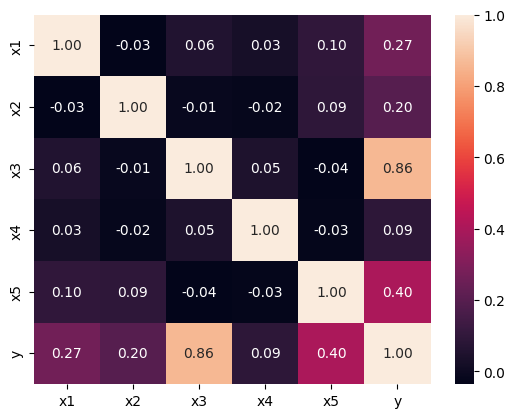

In [908]:
corr = reg_df.corr()
sns.heatmap(corr, annot = True, fmt = '.2f')
plt.show()

In [909]:
# Your code here. Add cells as needed

features = [0, 1, 2, 4]
Z = X[:, features]
Z_names = [column_names[idx] for idx in features]

# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

# create and fit linear model
model = LinearRegression()
model.fit(X_train, y_train)

# predict on train and test
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# calculate R2
R2_train = model.score(X_train, y_train)
R2_test = model.score(X_test, y_test)

# calculate MSE
MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)

print(f'R2_train: {R2_train:.3f}')
print(f'R2_test: {R2_test:.3f}')
print(f'MSE_train: {MSE_train:.3f}')
print(f'MSE_test: {MSE_test:.3f}')

R2_train: 0.993
R2_test: 0.993
MSE_train: 98.397
MSE_test: 85.502


In [910]:

model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 5,
 'coef_': array([21.52476416, 21.0447652 , 95.89526884,  6.65896819, 49.20515152]),
 'rank_': 5,
 'singular_': array([17.14087565, 16.37959118, 15.55438107, 14.33062407, 13.89550251]),
 'intercept_': np.float64(-6.884670944255217)}

In [911]:

coef

array([21.87990264, 21.20699885, 96.62079325,  6.92937604, 48.31504389])

#### Your written answers here

What are your model parameters?
- x1, x2, x3, x5

What were your MSE and R^2?
- R2_train: 0.990
- R2_test: 0.989
- MSE_train: 137.665
- MSE_test: 136.854

## Problem 2

Multiple Regression with Synthetic Data and Co-linearity

 - Show the correlation matrix for the 10 variables and the target variable.
 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [912]:
np.random.seed(15)
bias = 50*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=9,    # n_features = 10 --> multiple linear regression
                                   noise=3, 
                                   bias = bias, 
                                   n_informative = 6,
                                   effective_rank = 6,
                                   random_state=15, 
                                   shuffle = False, # samples will be in order
                                   coef = True)

Xa = (0.6*X[:, 2] + 0.4*X[:, 5]).reshape(-1, 1)
X = np.hstack([X, Xa])
coef = np.append(coef, 0)

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg2_df = pd.DataFrame(data = X, 
             columns = column_names)
reg2_df['y'] = y

print_model(bias, coef, column_names, model_name = 'True Model')

True Model:
 y = -15.62 + 55.43*x1 + 77.93*x2 + 94.15*x3 + 16.29*x4 + 57.11*x5 + 79.90*x6


           x1        x2        x3        x4        x5        x6        x7  \
x1   1.000000 -0.122208 -0.062702  0.084077  0.028478  0.022959  0.062263   
x2  -0.122208  1.000000  0.136134  0.039963  0.061391  0.054332 -0.029893   
x3  -0.062702  0.136134  1.000000  0.030812 -0.000049 -0.126819 -0.019003   
x4   0.084077  0.039963  0.030812  1.000000  0.142334  0.063798  0.351031   
x5   0.028478  0.061391 -0.000049  0.142334  1.000000  0.169430  0.065295   
x6   0.022959  0.054332 -0.126819  0.063798  0.169430  1.000000 -0.304274   
x7   0.062263 -0.029893 -0.019003  0.351031  0.065295 -0.304274  1.000000   
x8   0.227762 -0.328275  0.001744 -0.018117  0.041232  0.045689 -0.015712   
x9  -0.023237  0.011308 -0.015627 -0.088653  0.041396 -0.126809  0.073503   
x10 -0.041333  0.152333  0.803009  0.065421  0.101753  0.489318 -0.199520   
y    0.218693  0.459746  0.527825  0.171006  0.464552  0.431624 -0.121112   

           x8        x9       x10         y  
x1   0.227762 -0.023237 -0.04

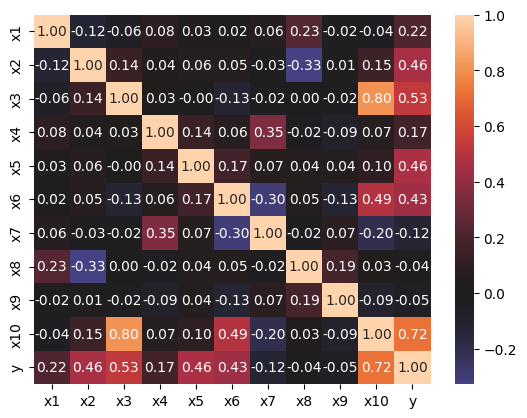

In [913]:
# calculate the correlation of features from the dataframe
corr = reg2_df.corr()
print(corr)
# plot heatmap
sns.heatmap(corr, annot=True, center=0, fmt='.2f') 
plt.show()

In [914]:
candidate_idx = [0, 1, 2, 3, 4, 5, 6]
# select columns from x
Z= X[:,candidate_idx]
Z_names = [column_names[i] for i in candidate_idx] # select column names

X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=0.2)

model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

R2_train = model_LR.score(X_train, y_train)
R2_test = model_LR.score(X_test, y_test)

y_pred_train = model_LR.predict(X_train)
y_pred_test = model_LR.predict(X_test)
MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)

In [915]:
print(f'R2_train: {R2_train:.2f}')
print(f'R2_test: {R2_test:.2f}')
print(f'MSE_train: {MSE_train:.2f}')
print(f'MSE_test: {MSE_test:.2f}')
print_model(bias, coef, column_names, model_name = 'True Model')
print_model(model_LR.intercept_, model_LR.coef_, Z_names, model_name = 'Fit Model')

R2_train: 0.87
R2_test: 0.89
MSE_train: 9.80
MSE_test: 7.76
True Model:
 y = -15.62 + 55.43*x1 + 77.93*x2 + 94.15*x3 + 16.29*x4 + 57.11*x5 + 79.90*x6
Fit Model:
 y = -15.38 + 58.80*x1 + 76.39*x2 + 103.78*x3 + 13.64*x4 + 56.43*x5 + 74.08*x6 + -8.82*x7


#### Your written answers here

What are your model parameters?
 - x1, x2, x3, x4, x5, x6, x7

Which features (x1, x2...) were significant? Which were co-linear?
 - significant features: x1, x2, x3, x4, x5, x6, x7
 - colinear pairs: x3, x6 are colinear with x10

What were your MSE and R^2?
- R2_train: 0.87
- R2_test: 0.89
- MSE_train: 9.80
- MSE_test: 7.76


## Problem 3

For this problem, you'll using housing data from King County, Washington (included as kc_housing.csv).

You should refer to the class notebook.

In [916]:
housing_df = pd.read_csv('kc_house_data.csv')
housing_df.head()
drop_columns = ['id', 'date', 'zipcode']
housing_df.drop(drop_columns, axis=1, inplace=True)
housing_df.head()
housing_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


### a. 

**Do this part before part b and then don't go back and change your responses.**

- Select three features to use for a multiple linear regression and justify your choices.
- Use the StandardScalar to scale your features. Fit a linear regression using those three features. What is your $R^2$?
- Plot predicted home values and actual home values, including a line representing perfect prediction.


<Axes: >

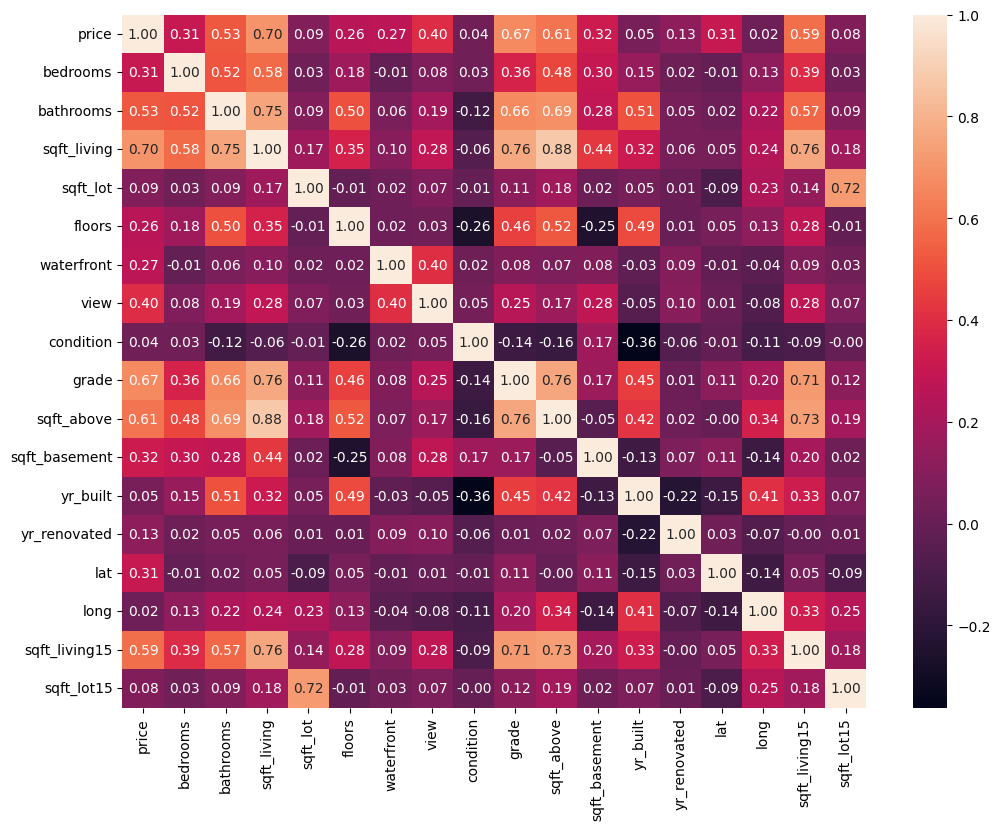

In [917]:
corr = housing_df.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr, annot=True,  fmt=".2f")

In [918]:
# Your code here. Add cells as needed.
# select features
features = ['bathrooms', 'sqft_living', 'grade']
X = housing_df[features]
y = housing_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


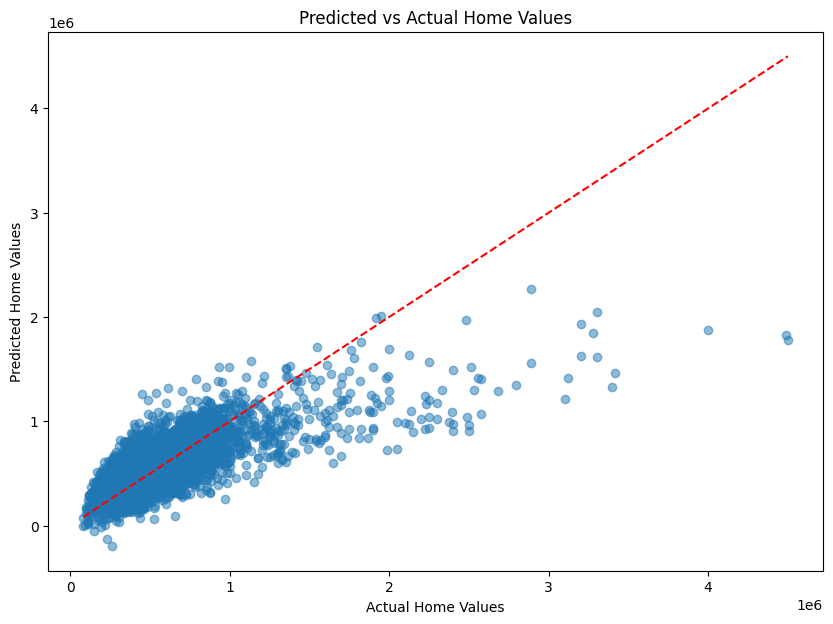

R2 = 0.55


In [919]:
from sklearn.discriminant_analysis import StandardScaler

ss = StandardScaler()
ss.fit(X_train)
# after fitting, ss object stores all properties of the scaler

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

model_linreg = LinearRegression()
model_linreg.fit(X_train_scaled, y_train)

plt.figure(figsize=(10, 7))
plt.scatter(y_test, model_linreg.predict(X_test_scaled), alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Home Values')
plt.ylabel('Predicted Home Values')
plt.title('Predicted vs Actual Home Values')
plt.show()

# calculate R2
print(f'R2 = {model_linreg.score(X_test_scaled, y_test):.2f}')

#### Your written answers here
Which features are you using and why?
 
I used bathrooms, sqft_living, and grade because they are strong predictors of house prices. More bathrooms, larger living areas and higher grades typically increase a house's value. 
<br/>
Also, these features show very high correlation with house prices in the correlation matrix, making them effective for the model.

### b. 
- Create a training and testing data using all the features except for price (that's the target), date, and zipcode. Once you have the dataframe of your features, save a list of column labels, ```feature_names = x.columns```.
- Use Lasso or Ridge regression to fit the model and calculate the $R^2$. Play around with $\alpha$ until you get $R^2 > 0.65$. Keep in mind that price is in the range of \$100k-3M and the scaled features will be in the range of -2 to 2, so $\alpha$ should be a big number.
- Get the coefficients of the Ridge or Lasso model; their order corresponds to the feature labels you saved earlier. Find the 3 biggest (absolute value) coefficients. Which features are they? Look up ```np.argsort()```; this function returns the indices of a list once it's been sorted. 
- Plot predicted vs actual home prices for the regularized model. 

R^2 value (train): 0.70
R^2 value (test): 0.70
Top 3 features: Index(['lat', 'sqft_living', 'grade'], dtype='object')


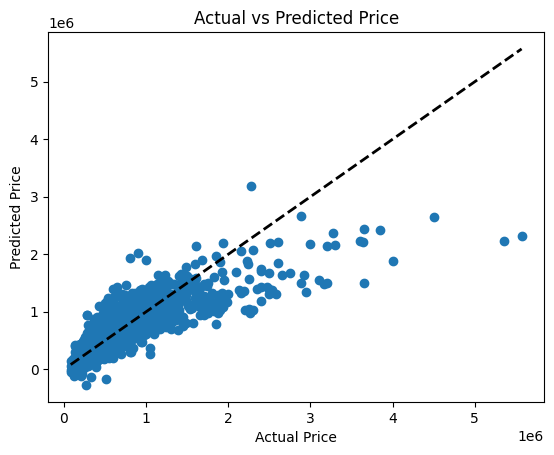

In [920]:
# Load the data
housing_df = pd.read_csv('kc_house_data.csv')

# Define the target variable
y = housing_df['price']

# Drop the unnecessary columns
housing_df.drop(['price', 'date', 'zipcode'], axis=1, inplace=True)

# Save the list of column labels
feature_names = housing_df.columns


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(housing_df, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.linear_model import Ridge

# Fit the Lasso regression model
alpha = 10  # Adjust alpha to get R^2 > 0.65
model_lasso = Ridge(alpha=alpha)
model_lasso.fit(X_train_scaled, y_train)

# Calculate R^2
r2_train = model_lasso.score(X_train_scaled, y_train)
r2_test = model_lasso.score(X_test_scaled, y_test)
print(f'R^2 value (train): {r2_train:.2f}')
print(f'R^2 value (test): {r2_test:.2f}')

# Get the coefficients
coefficients = model_lasso.coef_

# Find the 3 biggest (absolute value) coefficients
top_3_features_indices = np.argsort(np.abs(coefficients))[-3:]
top_3_features = feature_names[top_3_features_indices]
print(f'Top 3 features: {top_3_features}')

# Plot predicted vs actual home prices
y_pred = model_lasso.predict(X_test_scaled)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs Predicted Price')
plt.show()

### Your written answers here
Which regression did you use?
 - I used Ridge

Does your regularized model look better than your MLR? How so?
 - The regularized model looks better than the MLR, since the Ridge Regression model reduces overfitting by penalizing large coefficients, which leads to a more generalized model with better performance.

### c.
It seems that our model over-valuates houses in the higher price range.
 - Split the data into homes below and above $1M sale price. 
 - Fit a Lasso or Ridge model to each of the split data sets.
 - Plot predicted vs actual.

<Your written answers>

In [921]:
# Your code here. Add cells as needed.
# Load the data
housing_df = pd.read_csv('kc_house_data.csv')
housing_df.drop(['id', 'date', 'zipcode'], axis=1, inplace=True)

# Split the data into homes below and above $1M sale price
below_1M = housing_df[housing_df['price'] < 1000000]
above_1M = housing_df[housing_df['price'] >= 1000000]


In [922]:
# Correlation analysis to select features
corr_below = below_1M.corr()
corr_above = above_1M.corr()

# Select features with high correlation to price
features_below = corr_below['price'].abs().sort_values(ascending=False).index[1:6].tolist()
features_above = corr_above['price'].abs().sort_values(ascending=False).index[1:6].tolist()
features_below = corr_below['price'].abs().sort_values(ascending=False).index[1:5].tolist()
features_above = corr_above['price'].abs().sort_values(ascending=False).index[1:5].tolist()

# I was playing around to select good features but using all features turned out to be the best
features_below = corr_below['price'][corr_below['price'].abs() > 0.0].index.tolist()
features_above = corr_above['price'][corr_above['price'].abs() > 0.0].index.tolist()
features_below.remove('price')
features_above.remove('price')

print(f'Below $1M: {features_below}')
print(f'Above $1M: {features_above}')

Below $1M: ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
Above $1M: ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


R² for homes under $1M: 0.69
R² for homes over $1M: 0.55


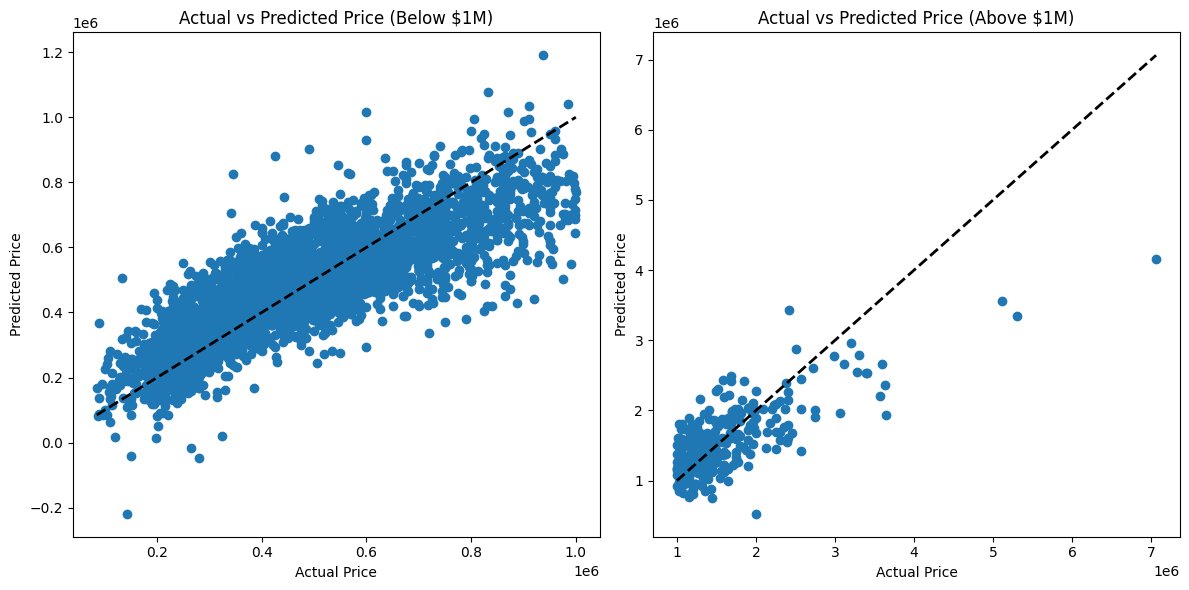

In [923]:

X_below = below_1M[features_below]
y_below = below_1M['price']
X_above = above_1M[features_above]
y_above = above_1M['price']

# Split the data into training and testing sets
X_below_train, X_below_test, y_below_train, y_below_test = train_test_split(X_below, y_below, test_size=0.2, random_state=1)
X_above_train, X_above_test, y_above_train, y_above_test = train_test_split(X_above, y_above, test_size=0.2, random_state=1)

# Scale the features
scaler = StandardScaler()
X_below_train_scaled = scaler.fit_transform(X_below_train)
X_below_test_scaled = scaler.transform(X_below_test)
X_above_train_scaled = scaler.fit_transform(X_above_train)
X_above_test_scaled = scaler.transform(X_above_test)

# Fit a Ridge model to each set
ridge_below = Ridge(alpha=1)
ridge_below.fit(X_below_train_scaled, y_below_train)

ridge_above = Ridge(alpha=1)
ridge_above.fit(X_above_train_scaled, y_above_train)

# Predict on the test sets
y_below_pred = ridge_below.predict(X_below_test_scaled)
r2_below = ridge_below.score(X_below_test_scaled, y_below_test)
y_above_pred = ridge_above.predict(X_above_test_scaled)
r2_above = ridge_above.score(X_above_test_scaled, y_above_test)
print(f'R² for homes under $1M: {r2_below:.2f}')
print(f'R² for homes over $1M: {r2_above:.2f}')

# Plot predicted vs actual for below $1M
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_below_test, y_below_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.plot([y_below_test.min(), y_below_test.max()], [y_below_test.min(), y_below_test.max()], 'k--', lw=2)
plt.title('Actual vs Predicted Price (Below $1M)')

# Plot predicted vs actual for above $1M
plt.subplot(1, 2, 2)
plt.scatter(y_above_test, y_above_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.plot([y_above_test.min(), y_above_test.max()], [y_above_test.min(), y_above_test.max()], 'k--', lw=2)
plt.title('Actual vs Predicted Price (Above $1M)')

plt.tight_layout()
plt.show()

 ### Your written answers here

 What are the $R^2$ for the two models?
- R² for homes under $1M: 0.69
- R² for homes over $1M: 0.55